# **SALES PREDICTION USING PYTHON - TASK 5**

# **INTERN NAME - AKAASH CHATTERJEE**

# Importing the required libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

## Reading the data

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Advertising.csv']))
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df = pd.read_csv('Advertising.csv', index_col=0)

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Checking for Null Values

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# **DATA ANALYSIS AND VISUALIZATION:-**

## Scatter plot to explore the relationship between TV and Sales:

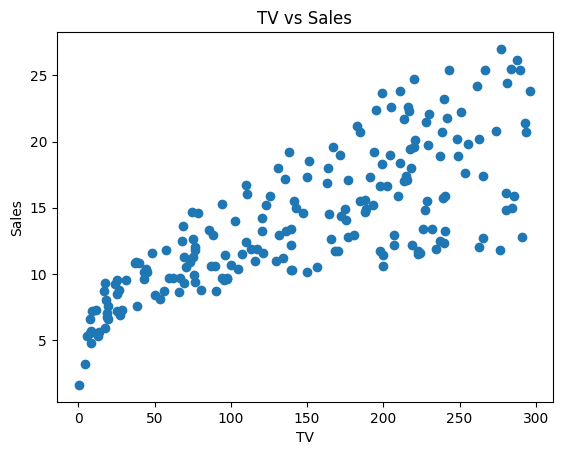

In [ ]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()

## Scatter plot to explore the relationship between Radio and Sales:

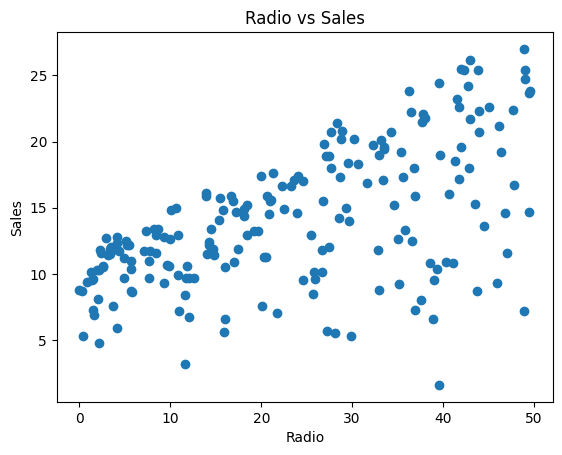

In [ ]:
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')
plt.show()


## Scatter plot to explore the relationship between Newspaper and Sales:

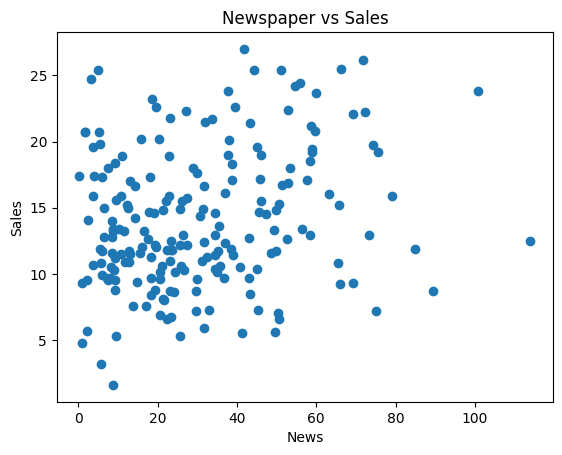

In [ ]:
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('News')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')
plt.show()

## Histogram to explore the distribution of Sales:

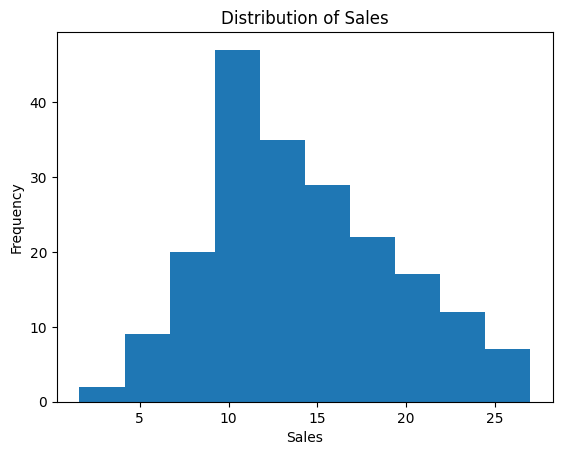

In [ ]:
plt.hist(df['Sales'])
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

## Box plot to explore the distribution of Sales:

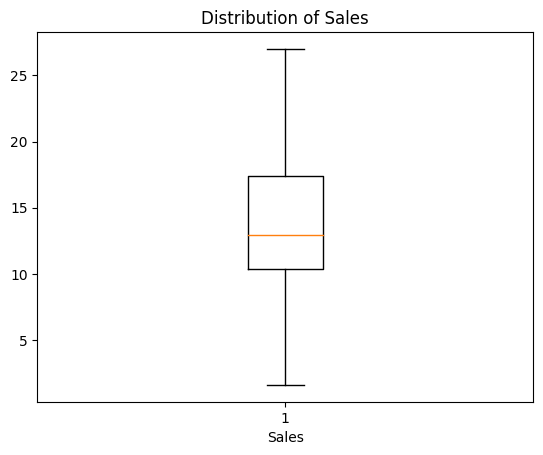

In [ ]:
plt.boxplot(df['Sales'])
plt.xlabel('Sales')
plt.title('Distribution of Sales')
plt.show()

## Correlation Matrix

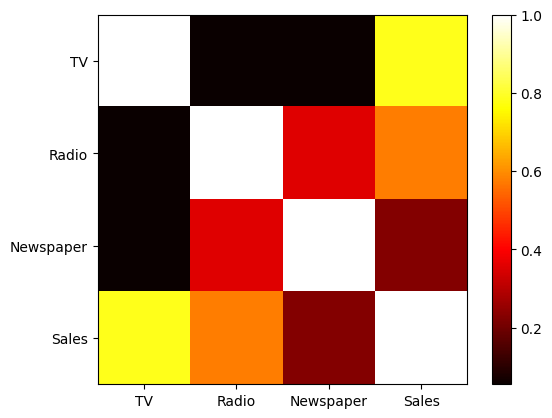

In [ ]:
plt.imshow(df.corr(), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

# **MODEL TRAINING AND EVALUATION:-**

In [ ]:
X=df.drop(columns = ['Sales'])
Y=df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

## USING LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [ ]:
model1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
prediction1 = model1.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(Y_test, prediction1)
r2 = r2_score(Y_test, prediction1)
print("Mean squared error: ", mse)
print("R-squared: ", r2)

Mean squared error:  3.1740973539761033
R-squared:  0.899438024100912


In [ ]:
print("Coefficients: ", model1.coef_)

Coefficients:  [0.04472952 0.18919505 0.00276111]


## Predicting the sales for a new set of features

In [ ]:
new_features = [[230.1,37.8,69.2]] # Example set of features for prediction
new_sales_pred = model1.predict(new_features)
print("Predicted sales: ", new_sales_pred)

Predicted sales:  [20.61397147]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
